### Multiple Linear Regression with categorical data

Data comes from Kaggle (polynomial regression)
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.rs

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

In [6]:
dataset = pd.read_csv('Student_Performance.csv')
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
dataset['Extracurricular Activities'].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

In [8]:
dataset.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


#### Separate X features & y labels

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Encode categorical data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 7, 99, 9, 1],
       [1.0, 0.0, 4, 82, 4, 2],
       [0.0, 1.0, 8, 51, 7, 2],
       ...,
       [0.0, 1.0, 6, 83, 8, 5],
       [0.0, 1.0, 9, 97, 7, 0],
       [1.0, 0.0, 7, 74, 8, 1]], dtype=object)

#### SPLIT into Training & Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### TRAIN the Regression model on Training set

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### VALIDATE the model

In [14]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

new_df = pd.DataFrame({'y_pred': y_pred.round(1), 'y_test': y_test })
new_df

,y_pred,y_test
0,50.5,53.0
1,53.1,50.0
2,78.2,80.0
3,25.4,24.0
4,67.4,64.0
...,...,...
1995,90.7,91.0
1996,41.7,42.0
1997,64.6,66.0
1998,25.9,27.0


#### EVALUATE the Model

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(5)
avg_perf = dataset['Performance Index'].mean()
mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
rmse = np.sqrt(mse).round(5)

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1-(1-r2)*(n-1)/(n-k-1)),7)

print(f"Mean Absolute Error: {mae}")
print(avg_perf)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error Error: {rmse}")

print(f"R2: {r2}")
print(f"R2 adjusted: {r2_adj}")

intercept = regressor.intercept_
print(f"Intercept: {intercept}, why is this negative?")


Mean Absolute Error: 1.62215
55.2248
Mean Squared Error: 4.1012
Root Mean Squared Error Error: 2.02514
R2: 0.9880814
R2 adjusted: 0.9880742
Intercept: -33.742556490415765, why is this negative?


It looks pretty good to me, MAE, MSE, RMSE are all very small. R squared and adusted come pretty high and both are close to each other. This is very very good model. Note anything north of 60% is a good model and this is 98.80%.

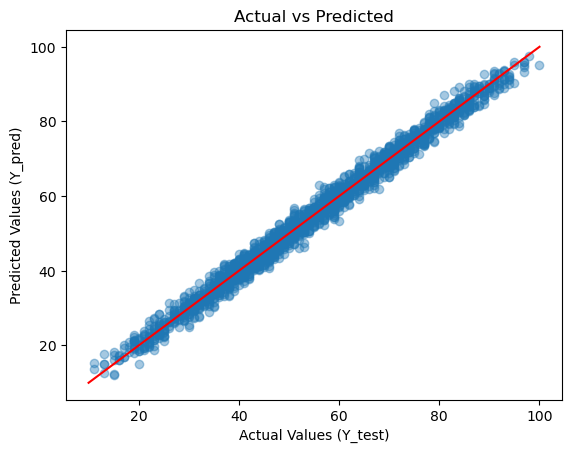

In [16]:
#Scatter Plot
plt.scatter(new_df['y_test'], new_df['y_pred'], alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('Actual vs Predicted')
plt.show()

#### PREDICT

In [17]:
# New students (lets take the average from df.describe())
predicted_sales = regressor.predict([[0, 1, 4.99, 69.44, 6.5, 4.6]])
predicted_sales #>>> which really is the average

array([55.53])

If a student does not participare in Extracurricular Act., studies for 4.99 hours, have previously scored 69.44, slept for 6.5 hours and have practiced 4.6 sample questions, then his/hers final performance would be 55.53

### Utilizing statsmodels library  
##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
dataset['ExtracAct'] = dataset['Extracurricular Activities'].map({'Yes': 1, 'No': 0}) #create one dummy variable for categorical data
dataset = dataset.drop(columns=['Extracurricular Activities'])
dataset = dataset[['Hours Studied', 'Previous Scores', 'ExtracAct', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']]
dataset = dataset.rename(columns={
    'Hours Studied': 'Hours_Studied',
    'Previous Scores': 'Previous_Scores',
    'ExtracAct': 'ExtracAct',
    'Sleep Hours': 'Sleep_Hours',
    'Sample Question Papers Practiced': 'Sample_Question_Papers_Practiced',
    'Performance Index': 'Performance_Index'
})
dataset

,Hours_Studied,Previous_Scores,ExtracAct,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [17]:
import statsmodels.formula.api as smf
independent_vars = dataset.columns[dataset.columns != 'Performance_Index']

# model
mlr = smf.ols(formula='Performance_Index ~ ' + ' + '.join(independent_vars), data=dataset).fit()

# coefficient analysis
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance_Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:35:36   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [18]:
r2, r2_adj, intercept  # <------- this is sklearn stats
#hmmmm using statsmodels library came better
# p-value says all variables are statistically significant, i.e. they are all less than 0.05 (standard significance level)

(0.9880814, 0.9880742, -33.742556490415765)